# Random Forest on Glass Dataset

This notebook demonstrates Exploratory Data Analysis (EDA), Data Preprocessing, Random Forest implementation, and comparison with Bagging and Boosting methods on the Glass dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load dataset
file_path = "glass.xlsx"
df = pd.read_excel(file_path, sheet_name="glass")

df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## 1. Exploratory Data Analysis (EDA)

In [3]:

# Dataset info
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290

## 2. Data Visualization

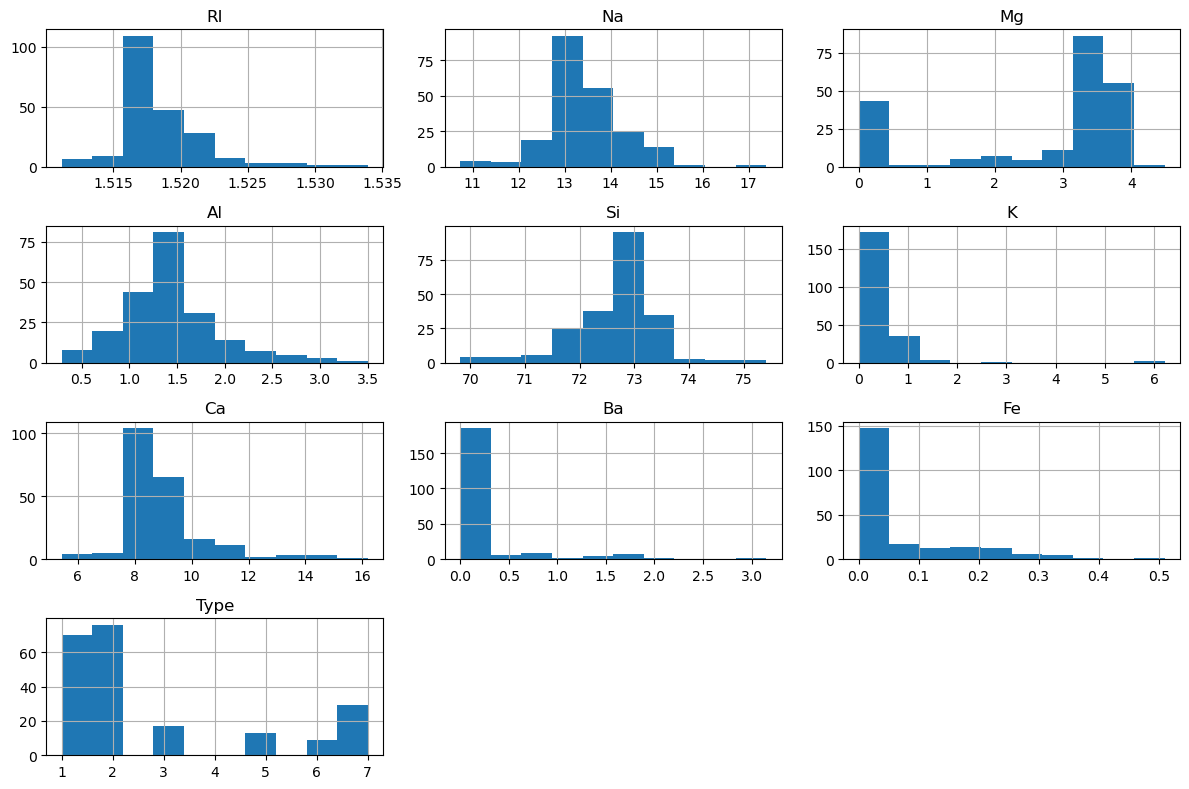

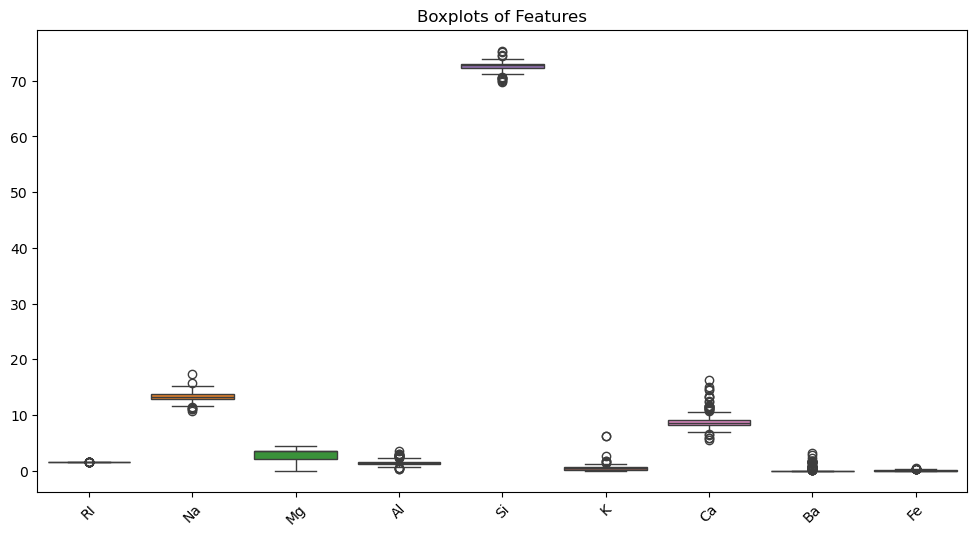

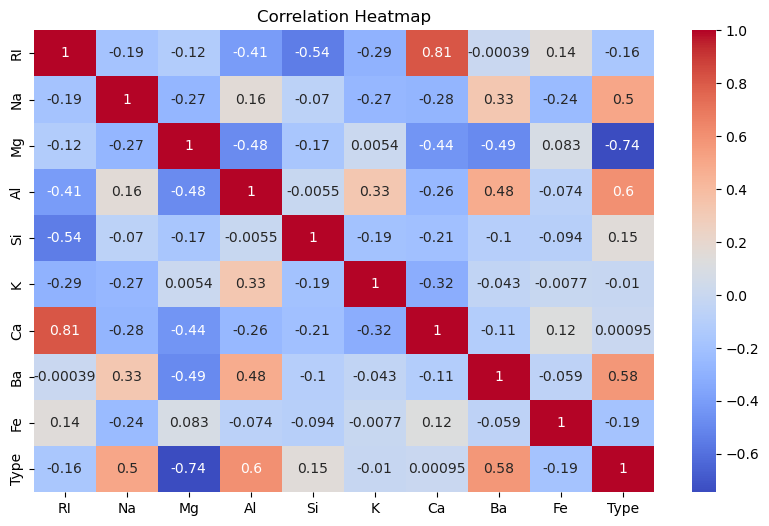

In [4]:

# Histograms
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Type", axis=1))
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## 3. Data Preprocessing

In [5]:

# Features and target
X = df.drop("Type", axis=1)
y = df["Type"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (171, 9)
Test shape: (43, 9)


## 4. Random Forest Model Implementation

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43

Accuracy: 0.813953488372093


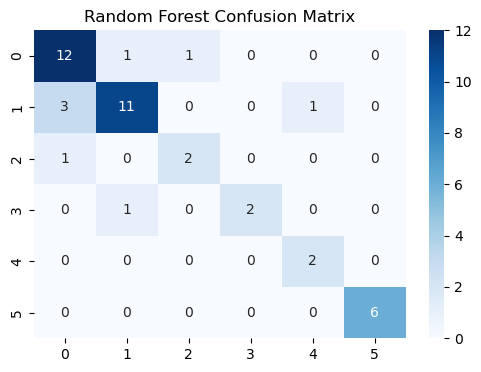

In [6]:

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


## 5. Bagging and Boosting Methods

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Bagging with Decision Tree
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
y_bag = bagging.predict(X_test)

# AdaBoost
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)
y_ada = adaboost.predict(X_test)

# Gradient Boosting
gboost = GradientBoostingClassifier(random_state=42)
gboost.fit(X_train, y_train)
y_gb = gboost.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_bag))
print("AdaBoost Accuracy:", accuracy_score(y_test, y_ada))
print("GradientBoosting Accuracy:", accuracy_score(y_test, y_gb))


Bagging Accuracy: 0.6976744186046512
AdaBoost Accuracy: 0.5348837209302325
GradientBoosting Accuracy: 0.813953488372093



## Notes

### Bagging
- Bagging (**Bootstrap Aggregating**) trains multiple base models (often Decision Trees) on different random samples of the dataset.  
- Each model votes (classification) or averages (regression).  
- Helps reduce variance and overfitting.  

### Boosting
- Boosting trains models sequentially, where each new model focuses on correcting errors made by previous ones.  
- Examples: AdaBoost, Gradient Boosting, XGBoost.  
- Helps reduce both bias and variance.  

### Bagging vs Boosting
- **Bagging**: Models are trained independently, results are combined.  
- **Boosting**: Models are trained sequentially, each one improves upon the previous.  

### Handling Imbalance in Data
- Techniques include:  
  1. **Resampling**: Oversampling minority class or undersampling majority class.  
  2. **Class weights**: Assign higher weights to minority class during training.  
  3. **Ensemble methods**: Some boosting algorithms handle imbalance naturally.  
